# Introduction
This project builds upon the previous project analysing the data. As such the data analysing aspects will be minimal and some reasonings examined in that project will not be fully explained here.

Previously, it was established that a model could perhaps be structured to predict whether a pokemon is Legendar. Subsequently, this project will be aiming to do so. However, to ensure that the model could be useful to the player,ideally, it need to function on a limited amount of information rather than relying on all the variables. (*I question why anyone would need such a model even then but regardless*) This should provide an opportunity to investigate how various combinations of variables affect the accuracy of a model. 

The original data is accessible from [here](https://www.kaggle.com/abcsds/pokemon )

# Import data and libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [2]:
pokemon = pd.read_csv("Pokemon.csv", index_col = "#")

# General Overview of data
Whilst the exploration of the data will be limited, key information for the data are as follows. 

In [3]:
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


In [5]:
pokemon.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## Total column
Please note, as established in the previous project, the total columns is the sum of the other numerical columns. 

In [6]:
pokemon["Sum"] = pokemon[['HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis = 1)

pokemon[pokemon["Sum"]!=pokemon["Total"]].any()

Name          False
Type 1        False
Type 2        False
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
Sum           False
dtype: bool

In [7]:
pokemon.drop("Sum", axis = 1, inplace = True)

# Legendary
The outcome variable or "y" variable in this model is the Legendary column. The following graphs show how the Legendary status differs from non-Legendary in key variables.

In [8]:
sns.set(style="ticks")

Text(0.5, 1.0, 'Attack vs Defense and Legendary data')

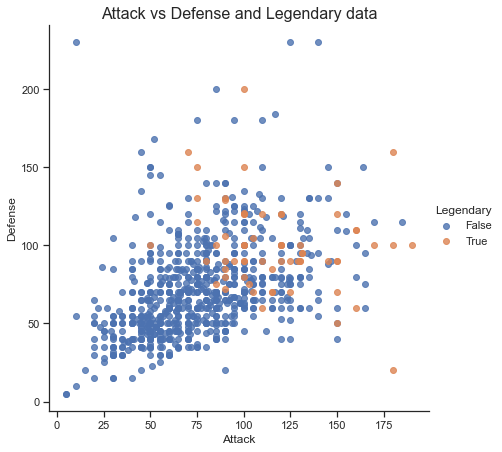

In [9]:
sns.lmplot(x = "Attack", y = "Defense", data = pokemon, hue = "Legendary", height = 6, fit_reg = False)
plt.title("Attack vs Defense and Legendary data", fontsize = 16)

Text(0.5, 1.0, 'Sp. Atk vs Sp. Def and Legendary data')

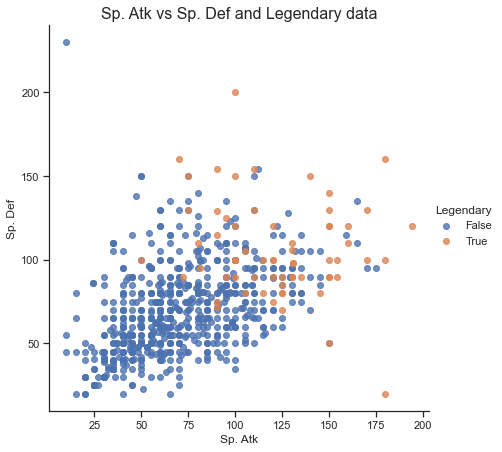

In [10]:
sns.lmplot(x = "Sp. Atk", y = "Sp. Def", data = pokemon, hue = "Legendary", height = 6, fit_reg = False)
plt.title("Sp. Atk vs Sp. Def and Legendary data", fontsize = 16)

Text(0.5, 1.0, 'Distribution of Speed separated by Legendary')

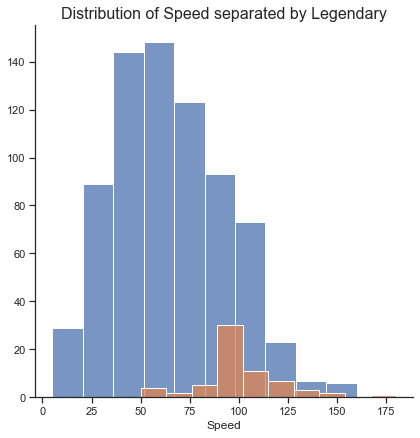

In [11]:
g = sns.FacetGrid(pokemon, hue = "Legendary", height = 6)
g.map( sns.histplot, "Speed", bins = 10)
plt.title("Distribution of Speed separated by Legendary", fontsize = 16)

Text(0.5, 1.0, 'Frequency of Type 1 data seperated by Legendary')

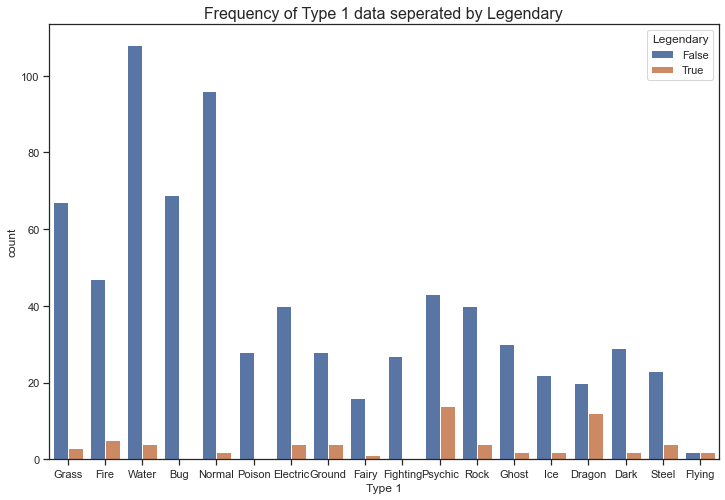

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x = "Type 1", data = pokemon, hue = "Legendary")
plt.title("Frequency of Type 1 data seperated by Legendary", fontsize = 16)

# Skewed data 
Before proceeding with the models, it should be acknowledged that the data has considerably more non-Legendary pokemons and thus skewed in favour of not legendary. As the below information shows, only 8.1% of the data is pokemons with Legendary status. This means a model could simply predict that all pokemons are non-Legendary and it would remain fairly accurate (approx 91.9% accuracy). However this is not the intention of the model.

One option to even out the distribution could be to alter the sample size by only using a specific generation or  type 1 as the percentage of Legendary pokemon differs under these parameters. 

In [13]:
sum(pokemon["Legendary"]== True)

65

In [14]:
(sum(pokemon["Legendary"]== True)/pokemon.shape[0])*100

8.125

For reference, the percentage of Legendary pokemons changes over time with some generations (generation 3) the percentage of Legendary pokemons was as high as 11.25%

In [15]:
pd.pivot_table(pokemon,index=["Generation"])

,Attack,Defense,HP,Legendary,Sp. Atk,Sp. Def,Speed,Total
Generation,,,,,,,,
1,76.638554,70.861446,65.819277,0.036145,71.819277,69.090361,72.584337,426.813253
2,72.028302,73.386792,71.207547,0.047170,65.943396,73.905660,61.811321,418.283019
3,81.625000,74.100000,66.543750,0.112500,75.806250,71.225000,66.925000,436.225000
4,82.867769,78.132231,73.082645,0.107438,76.404959,77.190083,71.338843,459.016529
5,82.066667,72.327273,71.787879,0.090909,71.987879,68.739394,68.078788,434.987879
6,75.804878,76.682927,68.268293,0.097561,74.292683,74.890244,66.439024,436.378049


Some pokemon Type 1 also have a higher Legendary percentage but the Type 1 categories are not evenly distributed throughout the dataset. Flying type pokemons are particularly rare in this dataset.

In [16]:
pivot = pd.pivot_table(pokemon,index=["Type 1"],)
pivot["Legendary"].sort_values(ascending = False).head()

Type 1
Flying     0.500000
Dragon     0.375000
Psychic    0.245614
Steel      0.148148
Ground     0.125000
Name: Legendary, dtype: float64

# Modelling the data
There are different models that could be used to predict legendary. However, for this project in specific, the RandomForecest has been chosen, with variables interchanged to compare its effect on the accuracy of the model.  
 

## Overall model
The overall model would be one which examines all/most variables for a pokemon and uses it to predict whether it is legendary. Without altering the sample data to balance the sample data, this may be the best model as it has the most amount of information. 

### Catogirical string variables

Prior to the creation of the model, the two string categories, Type 1 and Type 2, need to be converted, such that the models can process them correctly. Although there are a number of different options for this, as there are several variables in each column, encoding the data may be the best option. For instance, there are 18 variables in each column. If these variables are converted to dummies, up to 17 new columns would be created for each type. 

In [17]:
pokemon["Type 1"].nunique()

18

In [18]:
pokemon["Type 2"].nunique()

18

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()
pokemon['Type 1 Code'] = le.fit_transform(pokemon['Type 1'])
pokemon['Type 2 Code'] = le.fit_transform(pokemon['Type 2'])
pokemon = pokemon.drop(["Type 1", "Type 2"], axis =1)

In [21]:
pokemon.drop('Name',axis=1,inplace=True)

In [22]:
pokemon.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1 Code,Type 2 Code
#,,,,,,,,,,,
1,318,45,49,49,65,65,45,1,False,9,13
2,405,60,62,63,80,80,60,1,False,9,13
3,525,80,82,83,100,100,80,1,False,9,13
3,625,80,100,123,122,120,80,1,False,9,13
4,309,39,52,43,60,50,65,1,False,6,18


### Creating the model

In [23]:
X = pokemon.drop('Legendary',axis=1)
y = pokemon['Legendary']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101)

In [25]:
FullRFC = RandomForestClassifier()
FullRFC.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
FullRFC_pred = FullRFC.predict(X_test)

In [27]:
print(confusion_matrix(y_test,FullRFC_pred))
print(classification_report(y_test,FullRFC_pred))

[[217   2]
 [  9  12]]
              precision    recall  f1-score   support

       False       0.96      0.99      0.98       219
        True       0.86      0.57      0.69        21

    accuracy                           0.95       240
   macro avg       0.91      0.78      0.83       240
weighted avg       0.95      0.95      0.95       240



The accuracy in predicting the non Legendary pokemon is relatively high, with a f1 score of 98% which was expected. However the focus should be on the scores for Legendary pokemons (ie True values). In this model, the f1-scores for True values is 72%. 

The next stage of the project would be to attempt to create a model that has similar accuracies whilst using less variables. There are a plethora of opinions on selecting the combination of the variables. Therefore the below list of models are not an exhaustive list of combination and models that can be created. 

## Model 1 - Stats only
The first model focuses on the numerical data: 
* HP
* Attack
* Defence
* Sp. Atk
* Sp. Def
* Speed

As established previously, these columns are surmised in the total column and as such this column will be used as the x variable. 

In [28]:
Stats = pokemon[[ "Total"]]

In [29]:
X = Stats
y = pokemon['Legendary']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101)

In [31]:
StatsRFC = RandomForestClassifier()
StatsRFC.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
StatsRFC_pred = StatsRFC.predict(X_test)

In [33]:
print(confusion_matrix(y_test,StatsRFC_pred))
print(classification_report(y_test,StatsRFC_pred))

[[215   4]
 [  8  13]]
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       219
        True       0.76      0.62      0.68        21

    accuracy                           0.95       240
   macro avg       0.86      0.80      0.83       240
weighted avg       0.95      0.95      0.95       240



As was expected the f1 scores for the True values has decreased and is now 68%. It may be interesting to note that whilst the F1 scores have decreased by 4 percentage points, the accuracy of the overall model has only fallen by 1 percentage point. 

# Model 2 - Combat data
Model 2 culls the variables further with a view that a novice player may only focus on the below variables.
* Attack
* Defence
* HP

In [34]:
combat = pokemon[["Attack","Defense","HP"]]

In [35]:
X = combat
y = pokemon['Legendary']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101)

In [37]:
CombatRFC = RandomForestClassifier()
CombatRFC.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
CombatRFC_pred = CombatRFC.predict(X_test)

In [39]:
print(confusion_matrix(y_test,CombatRFC_pred))
print(classification_report(y_test,CombatRFC_pred))

[[213   6]
 [ 16   5]]
              precision    recall  f1-score   support

       False       0.93      0.97      0.95       219
        True       0.45      0.24      0.31        21

    accuracy                           0.91       240
   macro avg       0.69      0.61      0.63       240
weighted avg       0.89      0.91      0.90       240



Unsurprisingly the accuracy of the model has dropped significantly with an f1 score for True values scoring only 32%. 

# Model 3 stats + generation
Returning to model one, as we still exclude some variables, model 4 explores the impact of adding the generation variable into the model. 


In [40]:
StatsG = pokemon[[ "Total","Generation"]]

In [41]:
X = StatsG
y = pokemon['Legendary']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101)

In [43]:
StatsGRFC = RandomForestClassifier()
StatsGRFC.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
StatsGRFC_pred = StatsGRFC.predict(X_test)

In [45]:
print(confusion_matrix(y_test,StatsGRFC_pred))
print(classification_report(y_test,StatsGRFC_pred))

[[212   7]
 [  4  17]]
              precision    recall  f1-score   support

       False       0.98      0.97      0.97       219
        True       0.71      0.81      0.76        21

    accuracy                           0.95       240
   macro avg       0.84      0.89      0.87       240
weighted avg       0.96      0.95      0.96       240



Surprisingly this model scores better than the overall model in predicting the True values and the overall accuracy is also 1 percentage points higher than the overall model. It appears that perhaps the Type data may be having a negative effect on the True outcomes. 

# Model 4 - Key stats + generation
Keeping the generation factor, model 4 reduces some of the data concerning sp attack and sp defence. 
* HP
* Attack
* Defence
* Speed
* Generation


In [46]:
keydataG = pokemon.drop(['Total','Sp. Atk', 'Type 2 Code', 'Sp. Def',"Type 1 Code"], axis = 1)

In [47]:
X = keydataG.drop('Legendary',axis=1)
y = keydataG['Legendary']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101)

In [49]:
KeydataGRFC = RandomForestClassifier()
KeydataGRFC.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
KeydataGRFC_pred = KeydataGRFC.predict(X_test)

In [51]:
print(confusion_matrix(y_test,KeydataGRFC_pred))
print(classification_report(y_test,KeydataGRFC_pred))

[[217   2]
 [ 12   9]]
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       219
        True       0.82      0.43      0.56        21

    accuracy                           0.94       240
   macro avg       0.88      0.71      0.77       240
weighted avg       0.94      0.94      0.93       240



Sadly the accuracy has dropped to 94% and the F1 scores are now at 56%. Therefore it seems that sp Attack and defence are valuable in the accuracy of the model. 

# Model 5
The final model reverits the attention back to the types data and explores whether it could compensate for Sp attack, Sp defence and generation being excluded from the data. 
* Type 1 
* Type 2 
* HP
* Attack
* Defence 
* Speed


In [52]:
keydata = pokemon.drop(['Sp. Atk', 'Sp. Def',"Generation"], axis = 1)

In [53]:
X = keydata.drop('Legendary',axis=1)
y = keydata['Legendary']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101)

In [55]:
KeydataRFC = RandomForestClassifier()
KeydataRFC.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
KeydataRFC_pred = KeydataRFC.predict(X_test)

In [57]:
print(confusion_matrix(y_test,KeydataRFC_pred))
print(classification_report(y_test,KeydataRFC_pred))

[[216   3]
 [ 10  11]]
              precision    recall  f1-score   support

       False       0.96      0.99      0.97       219
        True       0.79      0.52      0.63        21

    accuracy                           0.95       240
   macro avg       0.87      0.76      0.80       240
weighted avg       0.94      0.95      0.94       240



# Models and data

## Overall model

In [58]:
print(confusion_matrix(y_test,FullRFC_pred))
print(classification_report(y_test,FullRFC_pred))

[[217   2]
 [  9  12]]
              precision    recall  f1-score   support

       False       0.96      0.99      0.98       219
        True       0.86      0.57      0.69        21

    accuracy                           0.95       240
   macro avg       0.91      0.78      0.83       240
weighted avg       0.95      0.95      0.95       240



## Model 1

In [59]:
print(confusion_matrix(y_test,StatsRFC_pred))
print(classification_report(y_test,StatsRFC_pred))

[[215   4]
 [  8  13]]
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       219
        True       0.76      0.62      0.68        21

    accuracy                           0.95       240
   macro avg       0.86      0.80      0.83       240
weighted avg       0.95      0.95      0.95       240



## Model 2

In [60]:
print(confusion_matrix(y_test,CombatRFC_pred))
print(classification_report(y_test,CombatRFC_pred))

[[213   6]
 [ 16   5]]
              precision    recall  f1-score   support

       False       0.93      0.97      0.95       219
        True       0.45      0.24      0.31        21

    accuracy                           0.91       240
   macro avg       0.69      0.61      0.63       240
weighted avg       0.89      0.91      0.90       240



# Model 3

In [61]:
print(confusion_matrix(y_test,StatsGRFC_pred))
print(classification_report(y_test,StatsGRFC_pred))

[[212   7]
 [  4  17]]
              precision    recall  f1-score   support

       False       0.98      0.97      0.97       219
        True       0.71      0.81      0.76        21

    accuracy                           0.95       240
   macro avg       0.84      0.89      0.87       240
weighted avg       0.96      0.95      0.96       240



# Model 4

In [62]:
print(confusion_matrix(y_test,KeydataGRFC_pred))
print(classification_report(y_test,KeydataGRFC_pred))

[[217   2]
 [ 12   9]]
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       219
        True       0.82      0.43      0.56        21

    accuracy                           0.94       240
   macro avg       0.88      0.71      0.77       240
weighted avg       0.94      0.94      0.93       240



# Model 5

In [63]:
print(confusion_matrix(y_test,KeydataRFC_pred))
print(classification_report(y_test,KeydataRFC_pred))

[[216   3]
 [ 10  11]]
              precision    recall  f1-score   support

       False       0.96      0.99      0.97       219
        True       0.79      0.52      0.63        21

    accuracy                           0.95       240
   macro avg       0.87      0.76      0.80       240
weighted avg       0.94      0.95      0.94       240



# Conclusion







This was a lighthearted project exploring the possibility of predicting whether a pokemon is legendary based on other characteristics. As highlighted, models can include all other features about a pokemon. However, it is questionable how valuable a model would be if the player needs to know every other feature of the pokemon. 

Consequently  the second stage of the project explored whether the variables of the model could be reduced keeping all other factors the same and achieve a relatively similar rate of accuracy. As this experiment highlighted, variables can have differing impacts on a model. Whilst this list is not exhaustive, in this project the variables, "Total","Generation" (Model 3), were shown to create the most accurate model. 

Going forward some aspects which may interest others would be whether the results change depending on the model, altering the sample, and trying other combinations of variables to name a few. For instance as the output is binary, logit could be an alternative model.  

*“The real voyage of discovery consists not in seeking new landscapes, but in having new eyes.”*
― [Marcel Proust](https://www.goodreads.com/quotes/tag?utf8=%E2%9C%93&id=discovery)